In [1]:
import photontorch as pt
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Ring(pt.Network):
    def __init__(self, wavelength=1.55e-6, phase=0, neff=3.4, loss=0):
        super(Ring, self).__init__()
        self.neff = neff
        self.wavelength = wavelength
        self.m = 30
        self.wg_length = self.m * wavelength / (self.neff * 2)# 单个直波导的长度
        self.loss = loss
        self.phase = phase
        self.dc1 = pt.DirectionalCoupler(coupling=0.05, trainable=False)
        self.dc2 = pt.DirectionalCoupler(coupling=0.05, trainable=False)
        self.wg1 = pt.Waveguide(length = self.wg_length, loss=self.loss, phase = 0, trainable = False, neff=self.neff)
        self.wg2 = pt.Waveguide(length = self.wg_length, loss=self.loss, phase = self.phase, trainable = True, neff=self.neff)
        self.source1 = pt.Source()
        self.source2 = pt.Source()
        self.detector1 = pt.Detector()
        self.detector2 = pt.Detector()
        self.term = pt.Term()
        self.link("source1:0", "0:dc1:3", "0:wg1:1", "1:dc2:0", "1:wg2:0", "2:dc1:1", "0:detector1")
        self.link("detector2:0", "2:dc2:3", "0:source2")

/opt/homebrew/anaconda3/envs/photontorch/lib/python3.9/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


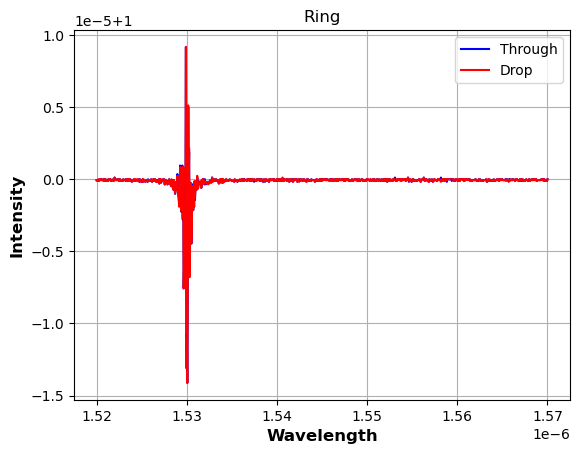

In [3]:
wavelength_list = 1e-6 * np.linspace(1.52, 1.57, 1000) # 测试不同波长下微环的透过率
env = pt.Environment(t_start = 0, t_end = 1e-12, dt = 5e-13, wl = wavelength_list, grad=False, freqdomain=True)
with env:
    detected_through = []
    detected_drop = []
    ring = Ring(wavelength=1.53e-6, neff=3.4, phase=0, loss=0)
    detected = ring(source = 1)[-1, :, :, 0]
    detected_through = detected[:, 0]
    detected_drop = detected[:, 1]
    # 绘制波长-强度关系图
    plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
    plt.plot(wavelength_list, np.array(detected_drop), 'r-', label = "Drop")
plt.xlabel("Wavelength", weight="bold", fontsize=12)
plt.ylabel("Intensity", weight="bold", fontsize=12)
plt.title("Ring")
plt.legend()
plt.grid()
plt.show()

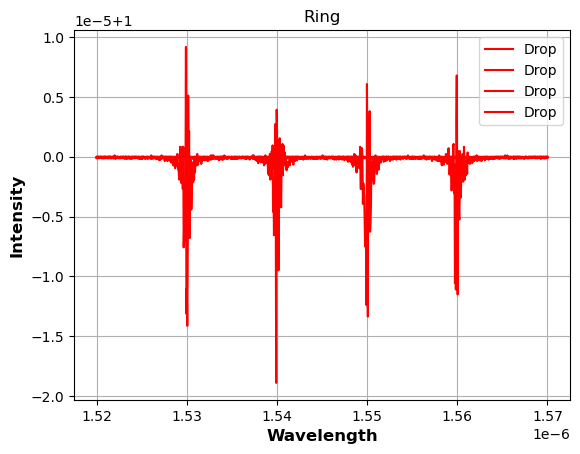

In [4]:
wavelength_list = 1e-6 * np.linspace(1.52, 1.57, 1000) # 测试不同波长下微环的透过率
env = pt.Environment(t_start = 0, t_end = 1e-12, dt = 5e-13, wl = wavelength_list, grad=False, freqdomain=True)
ring_wl = [1.53e-6, 1.54e-6, 1.55e-6, 1.56e-6]
for i in ring_wl:
    with env:
        detected_through = []
        detected_drop = []
        ring = Ring(wavelength=i, neff=3.4, phase=0, loss=0)
        detected = ring(source = 1)[-1, :, :, 0]
        detected_through = detected[:, 0]
        detected_drop = detected[:, 1]
        # 绘制波长-强度关系图
        # plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
        plt.plot(wavelength_list, np.array(detected_drop), 'r-', label = "Drop")
plt.xlabel("Wavelength", weight="bold", fontsize=12)
plt.ylabel("Intensity", weight="bold", fontsize=12)
plt.title("Ring")
plt.legend()
plt.grid()
plt.show()

/var/folders/l4/lcfm8tb94pdfqjcvxpy0w0580000gn/T/ipykernel_74647/1275856149.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


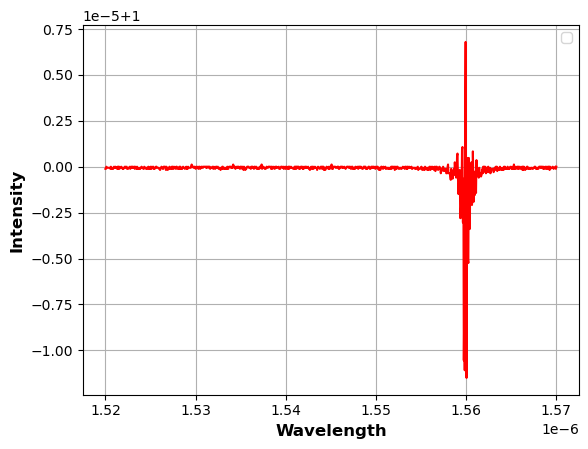

In [5]:
# 测试微环的谐振波长是否对准
wavelength_list = 1e-6 * np.linspace(1.52, 1.57, 1000)
frequency_list = []
for wl in wavelength_list:
    f = 3e8 / (3.4 * wl)
    frequency_list.append(f)
# phase_list = np.pi * np.linspace(0, 2, 100)
env = pt.Environment(t_start = 0, t_end = 1e-11, dt = 1e-12, wl = wavelength_list, grad=False, freqdomain=True)
with env:
    detected_through = []
    detected_drop = []
    ring = Ring(wavelength=1.56e-6, neff=3.4, phase=0, loss=0)
    detected = ring(source = 1)[-1, :, :, 0]
    detected_through = detected[:, 0]
    detected_drop = detected[:, 1]
    # 绘制波长-强度关系图
    # plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
    plt.plot(wavelength_list, np.array(detected_drop), 'r-')
    plt.xlabel("Wavelength", weight="bold", fontsize=12)
    plt.ylabel("Intensity", weight="bold", fontsize=12)
    # plt.xticks(1e-6 * np.linspace(1.54, 1.56, 10))
    plt.legend()
    plt.grid()
    plt.show()

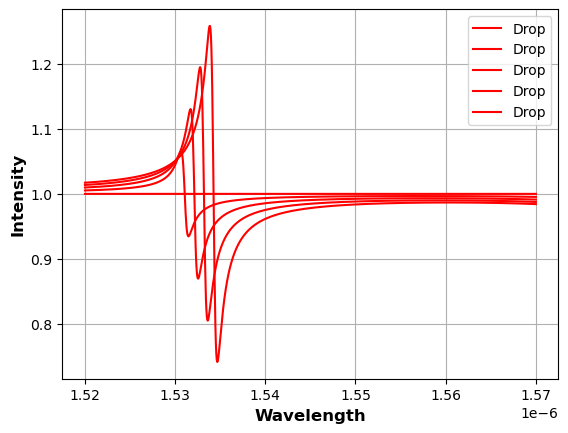

In [6]:
# 测试相移
wavelength_list = 1e-6 * np.linspace(1.52, 1.57, 1000)
phase_list = np.pi / 60 * np.linspace(0, 10, 5)
env = pt.Environment(t_start = 0, t_end = 1e-11, dt = 1e-12, wl = wavelength_list, grad=False, freqdomain=True)
for i in phase_list:
    with env:
        detected_through = []
        detected_drop = []
        ring = Ring(wavelength=1.53e-6, neff=3.4, phase=i, loss=0)
        detected = ring(source = 1)[-1, :, :, 0]
        detected_through = detected[:, 0]
        detected_drop = detected[:, 1]
        # 绘制波长-强度关系图
        # plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
        plt.plot(wavelength_list, np.array(detected_drop), 'r-', label = "Drop")

plt.xlabel("Wavelength", weight="bold", fontsize=12)
plt.ylabel("Intensity", weight="bold", fontsize=12)
plt.legend()
plt.grid()
plt.show()